In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 데이터 경로 설정
train_data_dir = '/content/drive/MyDrive/project_final/train'
validation_data_dir = '/content/drive/MyDrive/project_final/test'
test_data_dir = '/content/drive/MyDrive/project_final/test'

# 이미지 크기 및 배치 크기 설정
img_width, img_height = 150, 150
batch_size = 32

# 데이터 증강 설정
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# 데이터 불러오기 및 증강 적용
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    subset='training')  # 'training' subset을 명시하여 전체 훈련 데이터의 샘플 수를 설정

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=42,
    subset='validation')  # 'validation' subset을 명시하여 전체 검증 데이터의 샘플 수를 설정

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=1,
    class_mode=None,
    shuffle=False)

# CNN 모델 구성
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 학습
model.fit(
    train_generator,
    steps_per_epoch = 1,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

# 테스트 데이터로 모델 평가
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# 예측 결과 출력
for i, prediction in enumerate(predictions):
    class_index = tf.argmax(prediction).numpy() + 1  # 클래스 인덱스는 0부터 시작하므로 +1
    if class_index == 1:
        print(f"{i + 1}번째 이미지의 클래스는 1입니다.")
    elif class_index == 2:
        print(f"{i + 1}번째 이미지의 클래스는 2입니다.")
    elif class_index == 3:
        print(f"{i + 1}번째 이미지의 클래스는 3입니다.")
    elif class_index == 4:
        print(f"{i + 1}번째 이미지의 클래스는 4입니다.")


Found 12 images belonging to 4 classes.
Found 0 images belonging to 4 classes.
Found 5 images belonging to 4 classes.
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 1.3669 - accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 1s 722ms/step - loss: 1.9100 - accuracy: 0.3333
Epoch 3/10
1/1 [==============================] - 1s 760ms/step - loss: 2.2963 - accuracy: 0.5833
Epoch 4/10
1/1 [==============================] - 1s 940ms/step - loss: 1.7167 - accuracy: 0.4167
Epoch 5/10
1/1 [==============================] - 1s 715ms/step - loss: 1.3131 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 1s 764ms/step - loss: 1.1923 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 1s 762ms/step - loss: 1.0913 - accuracy: 0.6667
Epoch 8/10
1/1 [==============================] - 1s 1s/step - loss: 0.9419 - accuracy: 0.5833
Epoch 9/10
1/1 [==============================] - 2s 2s/step - loss: 0.7628 - accuracy: 1.0000
Epoch 10/

Found 12 images belonging to 4 classes.
Found 0 images belonging to 4 classes.
Found 5 images belonging to 4 classes.
Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 1.4030 - accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 2.6931 - accuracy: 0.2500
Epoch 3/10
1/1 [==============================] - 1s 726ms/step - loss: 1.9056 - accuracy: 0.4167
Epoch 4/10
1/1 [==============================] - 1s 690ms/step - loss: 1.6116 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 1s 725ms/step - loss: 1.3997 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 1s 691ms/step - loss: 1.3104 - accuracy: 0.5833
Epoch 7/10
1/1 [==============================] - 1s 714ms/step - loss: 1.2783 - accuracy: 0.4167
Epoch 8/10
1/1 [==============================] - 1s 684ms/step - loss: 1.1908 - accuracy: 0.6667
Epoch 9/10
1/1 [==============================] - 1s 673ms/step - loss: 1.1016 - accuracy: 0.6667
Epoch 

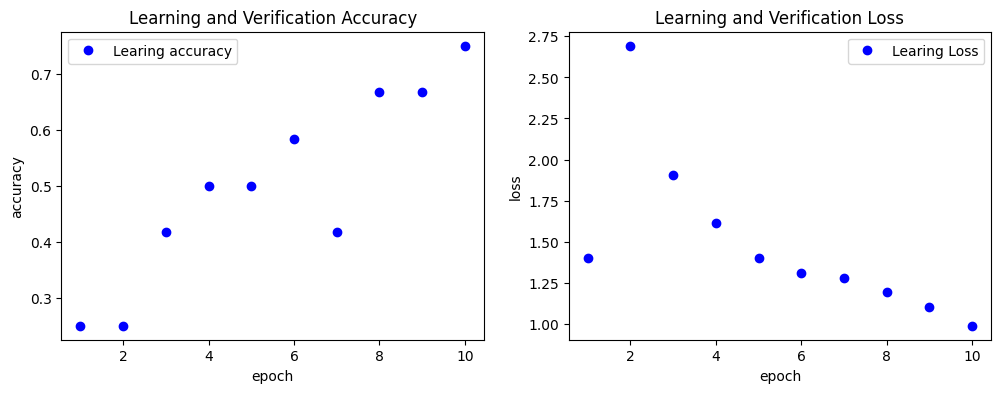

5/5 [==============================] - 0s 63ms/step
1번째 이미지의 클래스는 4입니다.
2번째 이미지의 클래스는 2입니다.
3번째 이미지의 클래스는 2입니다.
4번째 이미지의 클래스는 4입니다.
5번째 이미지의 클래스는 4입니다.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# 데이터 경로 설정
train_data_dir = '/content/drive/MyDrive/project_final/train'
validation_data_dir = '/content/drive/MyDrive/project_final/test'
test_data_dir = '/content/drive/MyDrive/project_final/test'

# 이미지 크기 및 배치 크기 설정
img_width, img_height = 150, 150
batch_size = 32

# 데이터 증강 설정
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# 데이터 불러오기 및 증강 적용
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    subset='training')  # 'training' subset을 명시하여 전체 훈련 데이터의 샘플 수를 설정

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=42,
    subset='validation')  # 'validation' subset을 명시하여 전체 검증 데이터의 샘플 수를 설정

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=1,
    class_mode=None,
    shuffle=False)

# CNN 모델 구성
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=1,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

# Plot training history
acc = history.history['accuracy']
val_acc = history.history.get('val_accuracy', None)  # 'val_accuracy' 대신 'val_acc'를 사용하도록 수정
loss = history.history['loss']
val_loss = history.history.get('val_loss', None)  # 'val_loss' 대신 'val_loss'를 사용하도록 수정
epochs = range(1, len(acc) + 1)

# Accuracy plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Learing accuracy')
if val_acc is not None:
    plt.plot(epochs, val_acc, 'b', label='Verification accuracy')
plt.title('Learning and Verification Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Learing Loss')
if val_loss is not None:
    plt.plot(epochs, val_loss, 'b', label='Verification Loss')
plt.title('Learning and Verification Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

# 테스트 데이터로 모델 평가
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# 예측 결과 출력
for i, prediction in enumerate(predictions):
    class_index = tf.argmax(prediction).numpy() + 1  # 클래스 인덱스는 0부터 시작하므로 +1
    if class_index == 1:
        print(f"{i + 1}번째 이미지의 클래스는 1입니다.")
    elif class_index == 2:
        print(f"{i + 1}번째 이미지의 클래스는 2입니다.")
    elif class_index == 3:
        print(f"{i + 1}번째 이미지의 클래스는 3입니다.")
    elif class_index == 4:
        print(f"{i + 1}번째 이미지의 클래스는 4입니다.")


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 데이터 경로 설정
train_data_dir = '/content/drive/MyDrive/project_final/train'
validation_data_dir = '/content/drive/MyDrive/project_final/test'
test_data_dir = '/content/drive/MyDrive/project_final/test'

# 이미지 크기 및 배치 크기 설정
img_width, img_height = 150, 150
batch_size = 32

# 데이터 증강 설정 (수정)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.0,  # 수정
    zoom_range=0.0,   # 수정
    horizontal_flip=False)  # 수정

test_datagen = ImageDataGenerator(rescale=1./255)

# 데이터 불러오기 및 증강 적용
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    subset='training')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=42,
    subset='validation')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=1,
    class_mode=None,
    shuffle=False)

# CNN 모델 구성
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 학습
model.fit(
    train_generator,
    steps_per_epoch = 1,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

# 테스트 데이터로 모델 평가
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# 예측 결과 출력
for i, prediction in enumerate(predictions):
    class_index = tf.argmax(prediction).numpy() + 1  # 클래스 인덱스는 0부터 시작하므로 +1
    if class_index == 1:
        print(f"{i + 1}번째 이미지의 클래스는 1입니다.")
    elif class_index == 2:
        print(f"{i + 1}번째 이미지의 클래스는 2입니다.")
    elif class_index == 3:
        print(f"{i + 1}번째 이미지의 클래스는 3입니다.")
    elif class_index == 4:
        print(f"{i + 1}번째 이미지의 클래스는 4입니다.")


Found 12 images belonging to 4 classes.
Found 0 images belonging to 4 classes.
Found 5 images belonging to 4 classes.
Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 1.3845 - accuracy: 0.1667
Epoch 2/10
1/1 [==============================] - 1s 726ms/step - loss: 2.2419 - accuracy: 0.2500
Epoch 3/10
1/1 [==============================] - 1s 719ms/step - loss: 2.0092 - accuracy: 0.3333
Epoch 4/10
1/1 [==============================] - 1s 637ms/step - loss: 1.3941 - accuracy: 0.5833
Epoch 5/10
1/1 [==============================] - 1s 620ms/step - loss: 1.1386 - accuracy: 0.5833
Epoch 6/10
1/1 [==============================] - 1s 742ms/step - loss: 1.0537 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 1s 719ms/step - loss: 0.8212 - accuracy: 0.7500
Epoch 8/10
1/1 [==============================] - 1s 659ms/step - loss: 0.6455 - accuracy: 0.8333
Epoch 9/10
1/1 [==============================] - 1s 921ms/step - loss: 0.4509 - accuracy: 0.9167
Epo